Vamos a ver unos histogramas y boxplots de las variables numéricas, para ver cómo se distribuyen y si tienen muchos valores atípicos.

In [3]:
import os 

print(os.getcwd())

C:\Users\cuent\En-Peu


<Figure size 1080x720 with 0 Axes>

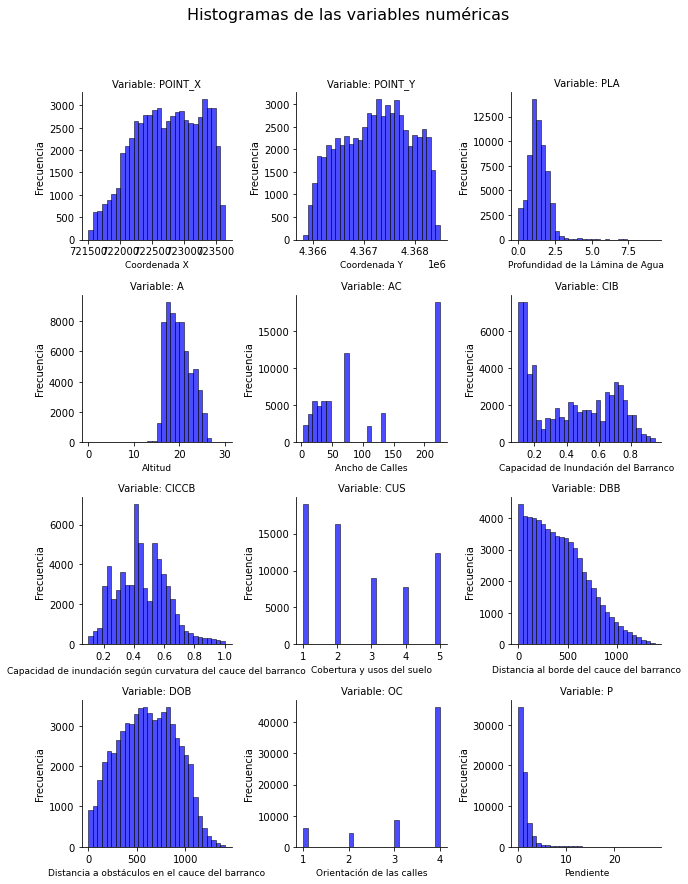

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Cambiar al directorio padre
os.chdir("..")
parent_directory = os.getcwd()

# os.path.join() maneja correctamente las barras de ruta para diferentes SO (Windows, Linux, macOS)
file_path = os.path.join(parent_directory, 'data', 'data_stored.csv')

# Cargar el archivo CSV
data = pd.read_csv(file_path)



# Para histogramas y boxplots facetados, necesitamos "aplanar" el DataFrame
data_long = data.melt(var_name="Variable", value_name="Valor")


# Creamos un diccionario con las descripciones de las variables para ponerlas en pie de foto

# 1. Definir el diccionario de descripciones de variables
# --- ¡IMPORTANTE! COMPLETA ESTE DICCIONARIO CON TUS DESCRIPCIONES REALES ---
variable_descriptions = {
    'CUS': 'Cobertura y usos del suelo',
    'OC': 'Orientación de las calles',
    'P': 'Pendiente',
    'PLA': 'Profundidad de la Lámina de Agua',
    'A': 'Altitud',
    'AC': 'Ancho de Calles',
    'CIB': 'Capacidad de Inundación del Barranco',
    'CICCB': 'Capacidad de inundación según curvatura del cauce del barranco',
    'DBB': 'Distancia al borde del cauce del barranco',
    'DOB': 'Distancia a obstáculos en el cauce del barranco',
    'POINT_X': 'Coordenada X',
    'POINT_Y': 'Coordenada Y',
    # Añade aquí el resto de tus variables numéricas con sus descripciones
    # Ejemplo: 'NombreVariable': 'Descripción Completa de la Variable',
}



#### HISTOGRAMA

plt.figure(figsize=(15, 10))
g = sns.FacetGrid(data_long, col="Variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.histplot, "Valor", bins=30, color="blue", edgecolor="black", alpha=0.7)
g.set_titles("Variable: {col_name}")

# Pie de foto
for ax, col_name in zip(g.axes.flat, g.col_names):
    # Obtén la descripción de la variable desde tu diccionario
    description = variable_descriptions.get(col_name, f"Variable {col_name}")
    
    # Establece el xlabel de cada subplot como el pie de foto descriptivo
    ax.set_xlabel(f'{description}', fontsize=9) # Ajusta el fontsize si es necesario
    
    # También puedes ajustar el ylabel si lo deseas
    ax.set_ylabel('Frecuencia')

    
    
g.fig.suptitle("Histogramas de las variables numéricas", y=1.02, fontsize=16) # Título general
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el layout para el título superior

# Guardar la figura en el directorio
plt.savefig(os.path.join(parent_directory, 'images','histogramas_analisis_exploratorio.png'), bbox_inches='tight', dpi=300)

# Mostrar el histograma
plt.show()


Como se puede ver en los histogramas, las variables no muestran una distribución normal, por lo tanto deberían ser normalizadas.

Ahora veremos los boxplots

C:\Users\cuent\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1800x1440 with 0 Axes>

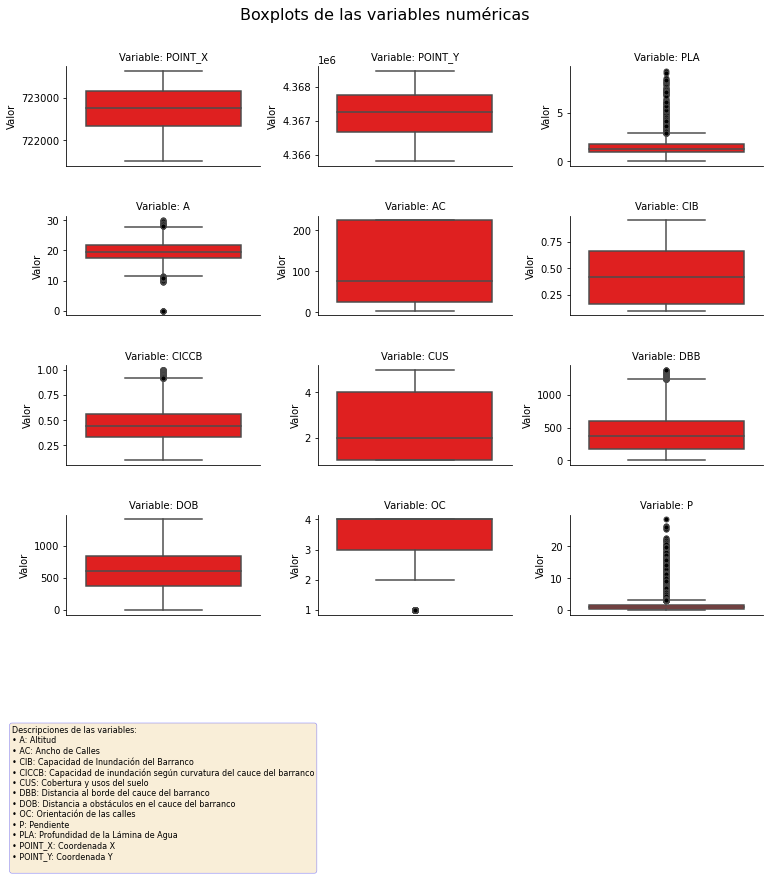

In [6]:
#### BOXPLOT

plt.figure(figsize=(25, 20)) # Ajusta el tamaño

data_long["_dummy_x_boxplot"] = ""

g_box = sns.FacetGrid(data_long, col="Variable", col_wrap=3, sharey=False,
                      height=3, aspect=1.2) 

# Map sns.boxplot:
# '_dummy_x_boxplot' va al eje X.
# 'Valor' va al eje Y.
g_box.map(sns.boxplot, "_dummy_x_boxplot", "Valor", color="red", flierprops=dict(marker='o', markerfacecolor='black', markersize=5))

# Limpiar las etiquetas y ticks del eje X dummy para que no se vean
g_box.set_axis_labels("", "Valor") # Pone etiqueta del eje X vacía, Y como "Valor"
# Iterar sobre cada subplot para quitar los ticks del eje X


for ax in g_box.axes.flat:
    ax.set_xticks([]) # Elimina los ticks del eje X
    ax.set_xticklabels([]) # Elimina las etiquetas de los ticks del eje X
    ax.set_xlabel("") # Asegúrate de que el xlabel esté vacío
    ax.set_ylabel("Valor") # Vuelve a poner la etiqueta del eje Y



g_box.set_titles("Variable: {col_name}")

# --- CREAR LA "LEYENDA" CONSOLIDADA COMO UN BLOQUE DE TEXTO ---
legend_text = "Descripciones de las variables:\n"
# Ordenar las variables para una leyenda más legible (opcional)
sorted_variables = sorted(data_long['Variable'].unique())
for var_name in sorted_variables:
    description = variable_descriptions.get(var_name, f"Descripción no disponible para {var_name}")
    legend_text += f"• {var_name}: {description}\n" # Usamos Markdown para negrita si es compatible con tu backend/visor
    
    
g_box.fig.text(0.02, 0.02, legend_text, ha='left', va='bottom', fontsize=8,
               bbox=dict(boxstyle="round,pad=0.3", fc="wheat", ec="b", lw=0.5, alpha=0.5),
               wrap=True) # wrap=True para que el texto se ajuste si es muy largo

g_box.fig.tight_layout(rect=[0, 0.3, 1, 0.98]) # Ajustado 'bottom' a 0.2

    
g_box.fig.suptitle("Boxplots de las variables numéricas", y=1.02, fontsize=16)
#plt.tight_layout(rect=[0.03, 0.02, 0.97, 0.97])

g_box.fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Guardar la figura en el directorio
plt.savefig(os.path.join(parent_directory, 'images','boxplot_analisis_exploratorio.png'), bbox_inches='tight', dpi=300)

# Mostrar los boxplots


plt.show()

En los boxplots se puede ver que PLA y P muestran una gran cantidad de valores atípicos. También los muestran en menor medida A, CICCB y DBB.

In [6]:
# Codigo usado antes para poner de pie de foto los nombres de las variables pero no funcionaba

#for ax, col_name in zip(g_box.axes.flat, g_box.col_names):
    # Obtén la descripción de la variable
#    description = variable_descriptions.get(col_name, f"Variable {col_name} (Descripción no disponible)")
    
    # Establece el xlabel de cada subplot como el pie de foto descriptivo
    # Este será el "pie de foto"
#    ax.set_xlabel(f'{col_name}: {description}', fontsize=9, labelpad=10) # labelpad para añadir espacio entre el gráfico y el texto

    
    # Limpiar las etiquetas y ticks del eje X dummy
#    ax.set_xticks([]) # Elimina los ticks del eje X
#    ax.set_xticklabels([]) # Elimina las etiquetas de los ticks del eje X
    
    # Asegurarse de que la etiqueta del eje Y sea "Valor" si es necesario
#    ax.set_ylabel("Valor")
    